In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import glob
import librosa
import librosa.display
import IPython.display as ipd
from scipy.signal import butter, filtfilt
from google.colab import drive
drive.mount('/content/drive');

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

Mounted at /content/drive


In [ ]:
path_audios = glob.glob("/content/drive/MyDrive/Universidad/TrabajosIA/proyecto/DATASET_AI/Training/Am/*.wav")
print(f"Longigutud del arrya: {len(path_audios)}")

Longigutud del arrya: 140


Audio 1 - Original


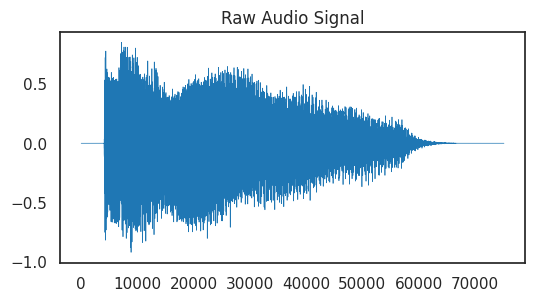

-------------------------------------------
Audio 2 - Original


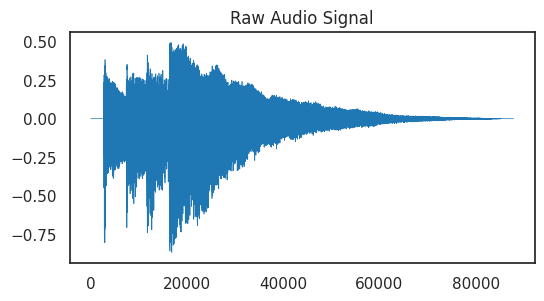

In [ ]:
y, sr = librosa.load(path_audios[10], sr=None) # y : Amplitud, sr : Frecuencia
y1, sr1 = librosa.load(path_audios[11], sr=None)
print("Audio 1 - Original")
ipd.display(ipd.Audio(path_audios[10]))
pd.Series(y).plot(figsize=(6, 3), lw=0.5, title='Raw Audio Signal')
plt.show()

print("-------------------------------------------")

print("Audio 2 - Original")
ipd.display(ipd.Audio(path_audios[11]))
pd.Series(y1).plot(figsize=(6, 3), lw=0.5, title='Raw Audio Signal')
plt.show()

# Visualización Espectrograma original
Graficamos los espectrogramas de los audios origianles para determinar y observar que tanto varía a la hora de la estandarización.

Audio 1: (1025, 147)


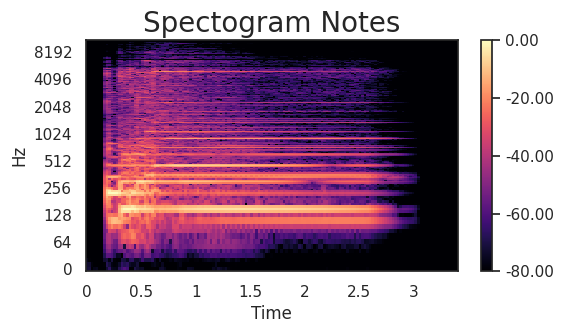

Audio 2: (1025, 172)


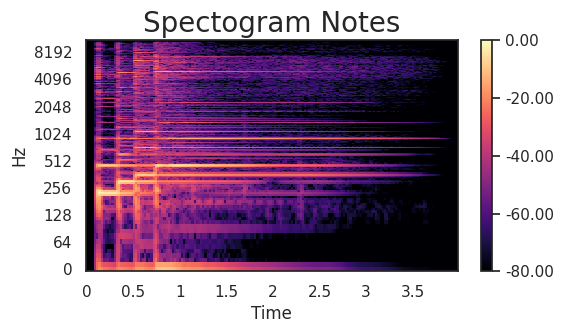

In [ ]:
# Transforma el audio desde el dominio del tiempo al dominio de la frecuencia,permitiendo ver cómo las frecuencias cambian a lo largo del tiempo.
D = np.abs(librosa.stft(y))
F = np.abs(librosa.stft(y1))

S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
print(f"Audio 1: {S_db.shape}")

# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(6, 3))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Notes', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

S_dbF = librosa.amplitude_to_db(np.abs(F), ref=np.max)
print(f"Audio 2: {S_dbF.shape}")

# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(6, 3))
img = librosa.display.specshow(S_dbF,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Notes', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

Audio1 (128, 147)


<Figure size 600x300 with 0 Axes>

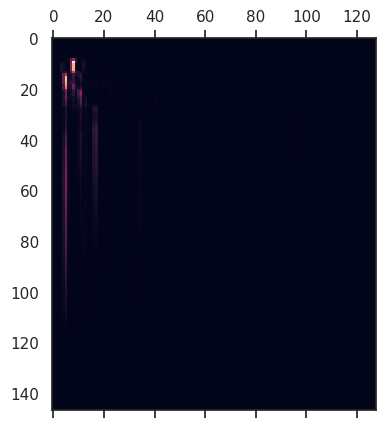

In [ ]:
#@title **Melspectrogram**
SP = librosa.feature.melspectrogram(y=y)
print(f'Audio1 {SP.shape}')
plt.figure(figsize=(6, 3))
plt.matshow(SP.T)

Audio2 (128, 172)


<Figure size 600x300 with 0 Axes>

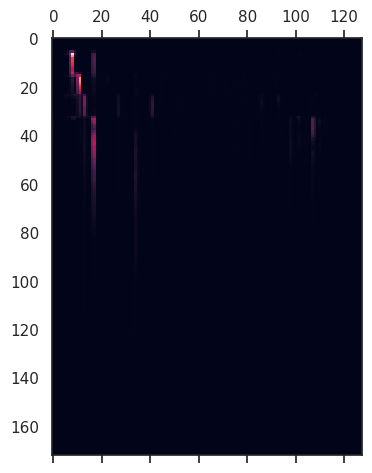

In [ ]:
SP = librosa.feature.melspectrogram(y=y1)
print(f'Audio2 {SP.shape}')
plt.figure(figsize=(6, 3))
plt.matshow(SP.T)

# Definir función de estandarización de los auidos
Esta función estandariza los auidos a cierto tiempo para que todos tengan la misma duración, ya sea agregandole valores y recortandolos

In [ ]:
def func_padding(wav, pad_size=95000):
    if wav.shape[0] > pad_size:
        return wav[0: pad_size]
    else:
        return np.hstack((wav, np.zeros(pad_size - wav.shape[0])))

In [ ]:
#y -> Audio 1 | y1 -> Audio 2
y_estand = func_padding(y)
y1_estand = func_padding(y1)

# Conversión a Audio
Luego de realizar la estandarización las amplitudes de los audios a un tiempo definido (6 segundos), convertimos nuevamente estas amplitudes a audio, utilizando la libreria `soundfile`. \\

Utilizando la función `write(file_name, amplitude, frequency)`.

*  `file_name`: Nombre que deseamos asignarle al auido, ejemplo "audio1.wav"
*  `amplitude`: La aplitud del audio.
*  `frequency`: Frecuencia del audio.

La implitud y la frecuencia son de los audios originales que devuelve la función `librosa.load()`


In [ ]:
import soundfile as sf

sf.write('audio1.wav', y_estand, sr)
sf.write('audio2.wav', y1_estand, sr1)

## Visualización de audios estandarizados

Audio 1 - Original


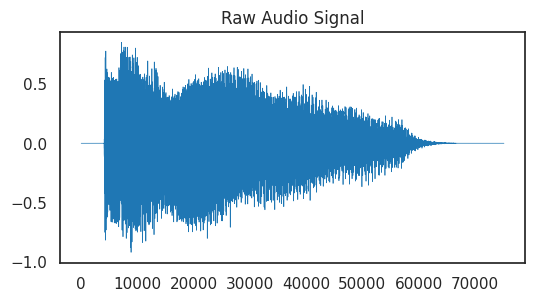

Audio 1 - Estandarizado


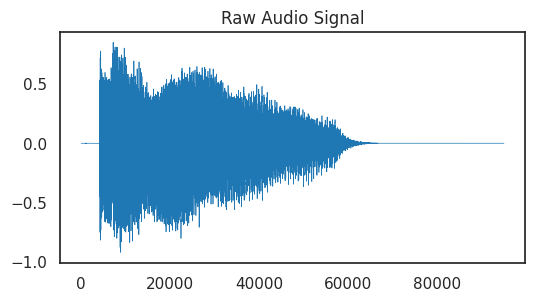

-------------------------------------------
Audio 2 - Original


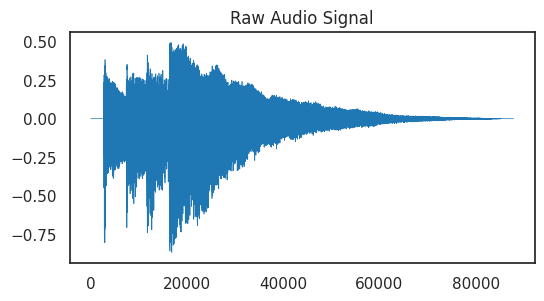

Audio 2 - Estandarizado


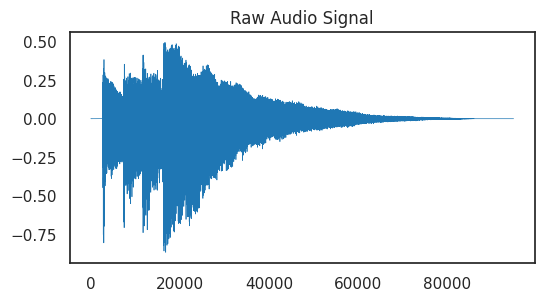

In [ ]:
print("Audio 1 - Original")
ipd.display(ipd.Audio(path_audios[10]))
pd.Series(y).plot(figsize=(6, 3), lw=0.5, title='Raw Audio Signal')
plt.show()
print("Audio 1 - Estandarizado")
ipd.display(ipd.Audio("/content/audio1.wav"))
pd.Series(y_estand).plot(figsize=(6, 3), lw=0.5, title='Raw Audio Signal')
plt.show()

print("-------------------------------------------")

print("Audio 2 - Original")
ipd.display(ipd.Audio(path_audios[11]))
pd.Series(y1).plot(figsize=(6, 3), lw=0.5, title='Raw Audio Signal')
plt.show()
print("Audio 2 - Estandarizado")
ipd.display(ipd.Audio("/content/audio2.wav"))
pd.Series(y1_estand).plot(figsize=(6, 3), lw=0.5, title='Raw Audio Signal')
plt.show()

# Calculo de Media y Varianza
Una vez explicado lo anterior y estandarizados los auidos, procedemos a realizar el calculo de la Media y Varianza. \\

Utilizaremos la carpeta `Training` donde dentro de ella, se encuntran los distinos todos de los acordes interpretadas por dintintas gritarras y rasgeos. \\

Subcarpetas de `Training`
* `Am` - La menor
* `Bb` - Si bemol
* `Bdim` - Si disminuida
* `C` - Do mayor
* `Dm` - Re menor
* `Em` - Mi menor
* `F` - Fa mayor
* `G` - Sol mayor

In [ ]:
D_matrices = []

for path in path_audios:
    y = librosa.load(path)
    y = func_padding(y[0])
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    D_matrices.append(D)


D_matrices = np.array(D_matrices)
print(D_matrices.shape)
D_mean = np.mean(D_matrices, axis=0)
print(D_mean.shape)
D_var = np.std(D_matrices, axis=0)
print(D_var.shape)

(140, 1025, 186)
(1025, 186)
(1025, 186)


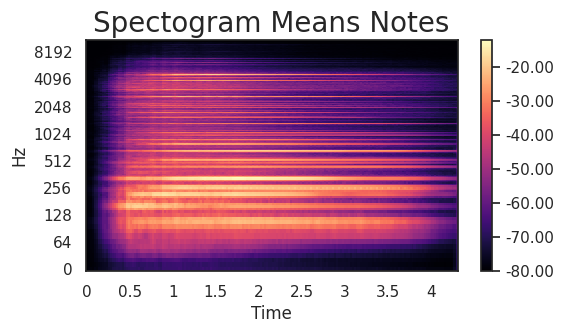

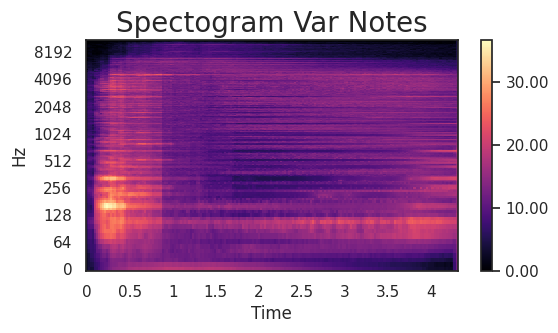

In [ ]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(6, 3))
img = librosa.display.specshow(D_mean,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Means Notes', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(6, 3))
img = librosa.display.specshow(D_var,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Var Notes', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

# **Crear el DataFrame**
Utilizamos todos los audios de todos los tonos para crear el DataFrame. Se cargaran las carptetas `Trainning` y `Testing`. Las cuales ya tienen los auidos particionados.

---

## **Definicion de Clases**
Se le asignaran nùmeros para identificar las dintintas clases que utilizaremos para el proyecto de clasificacion.
* `Am` - 0
* `Bb` - 1
* `Bdim` - 2
* `C` - 3
* `Dm` - 4
* `Em` - 5
* `F` - 6
* `G` - 7

El numero total de clase son `8`.

In [ ]:
def createDataFrame(folder, notas):
  start = 0;
  end = 0;
  all_data = []
  all_notas = []
  df = pd.DataFrame()
  for nota in notas:
    path = f"/content/drive/MyDrive/Universidad/TrabajosIA/proyecto/DATASET_AI/{folder}/{nota}/*.wav"
    end += len(glob.glob(path));
    print(end)
    path_audios = glob.glob(path)
    for audio in path_audios:
      y, sr = librosa.load(audio)
      y = func_padding(y)
      melspectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
      fila = melspectrogram.reshape((1,melspectrogram.shape[0]*melspectrogram.shape[1]))
      fila = fila.reshape((fila.shape[1],))
      all_data.append(fila)
      all_notas.append(nota)

  df = pd.concat([df, pd.DataFrame(all_data)], ignore_index=True)
  df.loc[start: end, 'Nota'] = all_notas
  start = end;
  return df

def func_padding(wav, pad_size=300000):
  if wav.shape[0] > pad_size:
      return wav[0: pad_size]
  else:
      return np.hstack((wav, np.zeros(pad_size - wav.shape[0])))

In [ ]:
#folder = Training o Testing
#folder = "Training"
notas = ["Am", "Bb", "Bdim", "C", "Dm", "Em", "F", "G"]

mapping_notas = {
    'Am': 0,
    'Bb': 1,
    'Bdim': 2,
    'C': 3,
    'Dm': 4,
    'Em': 5,
    'F': 6,
    'G': 7
}
#notas = ["Am", "Bb"]

df_train = createDataFrame("Training", notas)
df_train['Nota'] = df_train['Nota'].replace(mapping_notas)

df_test = createDataFrame("Test", notas)
df_test['Nota'] = df_test['Nota'].replace(mapping_notas)

#Union de ambos dataset
df = pd.concat([df_train, df_test], ignore_index=True)

print(f"Tamaño del DataFrame de Entrenamiento: {df_train.shape}")
print(f"Tamaño del DataFrame de Prueba: {df_test.shape}")

140
280
427
567
707
847
987
1127


<ipython-input-3-88e97af2c861>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['Nota'] = df_train['Nota'].replace(mapping_notas)


40
80
120
160
200
240
280
320


<ipython-input-3-88e97af2c861>:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['Nota'] = df_test['Nota'].replace(mapping_notas)


Tamaño del DataFrame de Entrenamiento: (1127, 75009)
Tamaño del DataFrame de Prueba: (320, 75009)


In [ ]:
df.shape

(1447, 75009)

In [ ]:
from google.colab import files
df.to_csv('/content/dataset_notas.csv', index=False)
files.download('/content/dataset_notas.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Entrenar los modelos
En esta etapa entrenaremos los modelos de clasificación vistos en el materia para nuestro proyecto.
 - Clasificación (DecisionTreeClassifier, RandomForestClassifier, SVC)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop('Nota', axis=1)
y = df['Nota']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### DecisiconTreeClassifier

In [ ]:
est = DecisionTreeClassifier()
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.8241379310344827


### RandomForestClassifier

In [ ]:
est = RandomForestClassifier()
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.9827586206896551


### Support vector machine (SVM)

In [ ]:
est = SVC()
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.7517241379310344


# **Learning curves: Tunning parameters**

# cross_val_score

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import matplotlib.pyplot as plt

def show_curve(est):
    means, stds = [], []
    nfolds_range = range(2, 10)
    for nfolds in nfolds_range:
        scores = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(accuracy_score))

        mean_score = np.mean(scores)
        std_score = np.std(scores)

        means.append(mean_score)
        stds.append(std_score)
        print(f"nfolds = {nfolds}: Mean Accuracy = {mean_score:.4f}, Std = {std_score:.4f}")

    means = np.array(means)
    stds = np.array(stds)

    # Graficar la curva de aprendizaje
    plt.plot(nfolds_range, means, label="Mean Accuracy", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=0.5, label="Standard Deviation")
    plt.xlabel("Number of Folds")
    plt.ylabel("Accuracy")
    plt.title("Learning Curve for Classification")
    plt.legend()
    plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

X = df.values[:,:-1]
y = df.values[:,-1]

print('DecisionTreeClassifier')
show_curve(DecisionTreeClassifier())
print('RandomForestClassifier')
show_curve(RandomForestClassifier())
print('SVC')
show_curve(SVC())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()

# Configurar la validación cruzada
n = 8 # Lo definimos segun la grafica anterior
cv = KFold(n_splits=n, shuffle=True, random_state=42)

# Evaluar el modelo con validación cruzada
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

# Imprimir resultados
print(f"Scores por fold: {scores}")
print(f"Precisión promedio: {np.mean(scores):.4f}")
print(f"Desviación estándar: {np.std(scores):.4f}")


# train_test_split

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

X = df.values[:,:-1]
y = df.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------
# Tuning para DecisionTree
# -------------------------
dt_params = {
    'max_depth': [3, 5, 10, None],
    'criterion': ['squared_error', 'absolute_error', 'poisson']
}
dt_grid = GridSearchCV(DecisionTreeRegressor(), dt_params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_

# -------------------------
# Tuning para RandomForest
# -------------------------
rf_params = {
    'n_estimators': [50, 100, 200],
    'criterion': ['squared_error', 'absolute_error', 'poisson']
}
rf_grid = GridSearchCV(RandomForestRegressor(), rf_params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

# -------------------------
# Tuning para SVR
# -------------------------
svr_params = {
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
svr_grid = GridSearchCV(SVR(), svr_params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
svr_grid.fit(X_train, y_train)
best_svr = svr_grid.best_estimator_

# Evaluar los modelos
models = {'DecisionTree': best_dt, 'RandomForest': best_rf, 'SVR': best_svr}
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse
    print(f'{name} MSE: {mse}')

# Imprimir los mejores parámetros
print("\nBest parameters:")
print("DecisionTree:", dt_grid.best_params_)
print("RandomForest:", rf_grid.best_params_)
print("SVR:", svr_grid.best_params_)


#**Clasificación con Redes Neuronales**

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

X = df.values[:,:-1]
y = df.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(1157, 75008)

##**Modelo con 3 capas ocultas**

In [ ]:
input_layer = tf.keras.layers.Flatten(input_shape=[75008])
hides1 = tf.keras.layers.Dense(128, activation='relu')
hides2 = tf.keras.layers.Dense(64, activation='relu')
hides3 = tf.keras.layers.Dense(32, activation='relu')
output_layer = tf.keras.layers.Dense(8, activation='softmax')

model = tf.keras.Sequential([input_layer, hides1, hides2, hides3, output_layer])
model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_14 (Flatten)                 │ (None, 75008)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_107 (Dense)                    │ (None, 128)                 │       9,601,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_108 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_109 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_110 (Dense)                    │ (None, 8)                   │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,611,752 (36.67 MB)

 Trainable params: 9,611,752 (36.67 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.8922 - loss: 3.9631
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9231 - loss: 2.6654
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8993 - loss: 5.1589
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9419 - loss: 1.7631
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9709 - loss: 0.3997
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9593 - loss: 0.9947
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9713 - loss: 1.2147
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9811 - loss: 0.4953
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9762 - loss: 0.7504
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9871 - loss: 0.4611


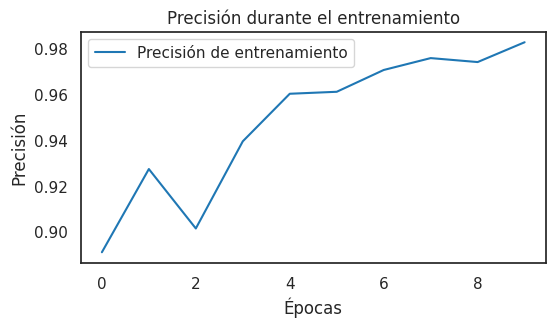

In [ ]:
# Graficar la precisión
plt.figure(figsize=(6, 3))
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8948 - loss: 9.0910
Test accuracy: 0.9034482836723328


In [ ]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

print("Clases predichas para las primeras 10 muestras:")
print(predicted_classes[:10])
print("Valores reales de y_test para las primeras 10 muestras:")
print(y_test[:10])

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Clases predichas para las primeras 10 muestras:
[7 2 5 3 1 1 2 0 3 1]
Valores reales de y_test para las primeras 10 muestras:
[7. 2. 5. 3. 1. 1. 2. 0. 3. 1.]


##**Modelo con 6 capas ocultas**

In [ ]:
input_layer = tf.keras.layers.Flatten(input_shape=[75008])
hides1 = tf.keras.layers.Dense(256, activation='relu')
hides2 = tf.keras.layers.Dense(128, activation='relu')
hides3 = tf.keras.layers.Dense(64, activation='relu')
hides4 = tf.keras.layers.Dense(32, activation='relu')
hides5 = tf.keras.layers.Dense(16, activation='relu')
hides6 = tf.keras.layers.Dense(8, activation='relu')
output_layer = tf.keras.layers.Dense(8, activation='softmax')

model2 = tf.keras.Sequential([input_layer, hides1, hides2, hides3, hides4, hides5, hides6, output_layer])
model2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_17 (Flatten)                 │ (None, 75008)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_129 (Dense)                    │ (None, 256)                 │      19,202,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_130 (Dense)                    │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_131 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_132 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_133 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_134 (Dense)                    │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_135 (Dense)                    │ (None, 8)                   │              72 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,246,272 (73.42 MB)

 Trainable params: 19,246,272 (73.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history2 = model2.fit(X_train, y_train, epochs=10)

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.1559 - loss: 6.8147
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1377 - loss: 2.0805
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1281 - loss: 2.0793
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1321 - loss: 2.0796
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1342 - loss: 2.0798
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1320 - loss: 2.0762
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1347 - loss: 2.0766
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1250 - loss: 2.0764
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1399 - loss: 2.0799
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1396 - loss: 2.0754


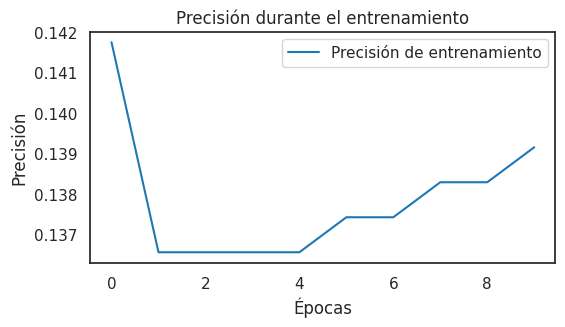

In [ ]:
# Graficar la precisión
plt.figure(figsize=(6, 3))
plt.plot(history2.history['accuracy'], label='Precisión de entrenamiento')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model2.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.0764 - loss: 2.0831
Test accuracy: 0.079310342669487


In [ ]:
predictions = model2.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

print("Clases predichas para las primeras 10 muestras:")
print(predicted_classes[:10])
print("Valores reales de y_test para las primeras 10 muestras:")
print(y_test[:10])

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Clases predichas para las primeras 10 muestras:
[3 3 3 3 3 3 3 3 3 3]
Valores reales de y_test para las primeras 10 muestras:
[7. 2. 5. 3. 1. 1. 2. 0. 3. 1.]


##**Modelo con 10 capas ocultas**

In [ ]:
input_layer = tf.keras.layers.Flatten(input_shape=[75008])
hides1 = tf.keras.layers.Dense(512, activation='relu')
hides2 = tf.keras.layers.Dense(256, activation='relu')
hides3 = tf.keras.layers.Dense(128, activation='relu')
hides4 = tf.keras.layers.Dense(64, activation='relu')
hides5 = tf.keras.layers.Dense(32, activation='relu')
hides6 = tf.keras.layers.Dense(16, activation='relu')
hides7 = tf.keras.layers.Dense(8, activation='relu')
hides8 = tf.keras.layers.Dense(4, activation='relu')
hides9 = tf.keras.layers.Dense(2, activation='relu')
hides10 = tf.keras.layers.Dense(1, activation='relu')
output_layer = tf.keras.layers.Dense(8, activation='softmax')

model3 = tf.keras.Sequential([input_layer, hides1, hides2, hides3, hides4, hides5, hides6, hides7, hides8, hides9, hides10, output_layer])
model3.summary()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_19 (Flatten)                 │ (None, 75008)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_147 (Dense)                    │ (None, 512)                 │      38,404,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_148 (Dense)                    │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_149 (Dense)                    │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_150 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_151 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_152 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_153 (Dense)                    │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_154 (Dense)                    │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_155 (Dense)                    │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_156 (Dense)                    │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_157 (Dense)                    │ (None, 8)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,579,897 (147.17 MB)

 Trainable params: 38,579,897 (147.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history3 = model3.fit(X_train, y_train, epochs=10)

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 105ms/step - accuracy: 0.1125 - loss: 2.0795
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.1166 - loss: 2.0795
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.1346 - loss: 2.0792
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1427 - loss: 2.0789
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1319 - loss: 2.0791
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1412 - loss: 2.0787
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1315 - loss: 2.0792
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1557 - loss: 2.0773
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1255 - loss: 2.0794
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1400 - loss: 2.0788


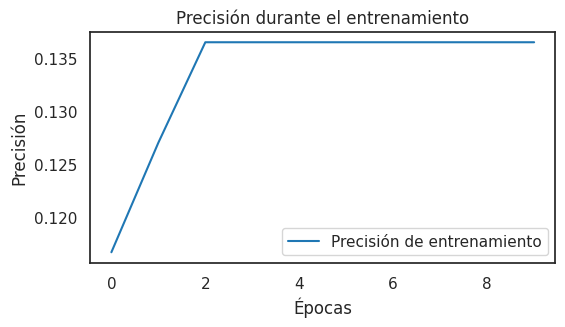

In [ ]:
# Graficar la precisión
plt.figure(figsize=(6, 3))
plt.plot(history3.history['accuracy'], label='Precisión de entrenamiento')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model3.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.0751 - loss: 2.0836
Test accuracy: 0.07586207240819931


In [ ]:
predictions = model3.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

print("Clases predichas para las primeras 10 muestras:")
print(predicted_classes[:10])
print("Valores reales de y_test para las primeras 10 muestras:")
print(y_test[:10])

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Clases predichas para las primeras 10 muestras:
[3 3 3 3 3 3 3 3 3 3]
Valores reales de y_test para las primeras 10 muestras:
[7. 2. 5. 3. 1. 1. 2. 0. 3. 1.]
